## 实验：BGR 色彩空间直方图均衡

### 实验概述

Python 读取 BGR 格式的图像。您可以使用以下命令将 `B`，`G` 和 `R` 的三个平面分开：

```python
b,g,r = cv2.split(img)
```
之后，您就可以独立访问每个平面了，每个平面类似于灰度图像。您的任务是读取 `BGR` 图像并拆分其平面。

```python
bgr = cv2.merge([b,g,r]);
```
然后，在每个平面上执行直方图均衡化。之后，使用以下命令再次组合平面：

### 实验目标

在本实验中，我们将把一张 BGR 格式的图像进行通道分离，并对各个平面执行独立的直方图均衡化，之后，把均衡化后的平面重新组合成为新的 BGR 图像。

我们首先使用直方图均衡，然后再使用 CLAHE，根据您的观察，请考虑这是否是对彩色图像执行直方图均衡的好方法。

### 1. 导入依赖库

In [ ]:
import cv2                         # 导入OpenCV
import matplotlib.pyplot as plt   # 导入matplotlib

# 魔法指令，使图像直接在Notebook中显示
%matplotlib inline

### 2. 使用默认 BGR 模式读取图像

In [ ]:
# 设置输入输出路径
import os
base_path = os.environ.get("BASE_PATH",'../data/')
data_path = os.path.join(base_path + "lab3/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

img = cv2.imread('./data/bloom.jpg') # 读取图像

您可以使用 OpenCV 的 `cv2.imshow` 显示图像，也可以使用 Matplotlib。在本实验中，由于我们在 Jupyter Notebook 中实现，我们将使用 Matplotlib，您可以进一步熟悉其语法。Matplotlib 使用 `RGB` 格式的图像，因此，您应该先将 `BGR` 图像转换为 `RGB`：

X 和 Y 轴上的值显示所显示图像的宽度和高度。

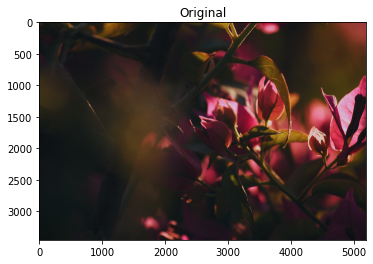

In [3]:
# 将图像转换为RGB模式
origrgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB);  
# 指定显示转换后的图像
imgplot = plt.imshow(origrgb)                   
# 指定图像标题
plt.title('Original')                           
# 显示图像
plt.show()                                      

### 3. 分离 BGR 通道

将 BGR 图像分成三个通道。

BGR图像中 ——

- 第一个是 B（蓝色）通道。
- 第二个是 G（绿色）通道，
- 第三个是 R（红色）通道：

In [4]:
b,g,r = cv2.split(img); # 分离 BGR 通道

### 4. 执行直方图均衡化

对每个通道应用直方图均衡化。

In [5]:
b = cv2.equalizeHist(b); # 对b通道执行直方图均衡化
g = cv2.equalizeHist(g); # 对g通道执行直方图均衡化
r = cv2.equalizeHist(r); # 对r通道执行直方图均衡化

### 5. 合并通道

In [6]:
# 将完成直方图化的b、g、r平面进行合并
bgr = cv2.merge([b,g,r]); 

### 6. 使用 Matplotlib 显示合并后的图像

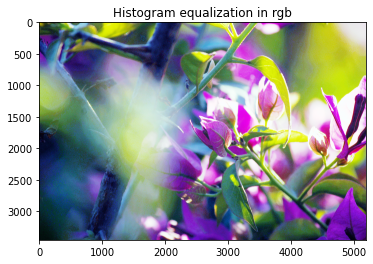

In [7]:
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB); # 将图像转换为RGB显示
imgplot = plt.imshow(rgb)                  # 指定显示转换后的图像
plt.title('Histogram equalization in rgb') # 指定图像标题
plt.show()                                 # 显示图像  

### 7. 再次分离 BGR 通道

要使用 CLAHE 重复相同的过程，请再次将原始图像分成三个通道：

In [8]:
b,g,r = cv2.split(img);  # 分离 BGR 通道

### 8. 创建 CLAHE 对象并应用

创建一个 CLAHE 对象，然后将其分别应用与每个通道：

In [9]:
# 创建一个阈值为4，区快尺寸为16x16的CLAHE对象
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(16,16)) 
# 应用 CLAHE 对象至b通道
b = clahe.apply(b)                                           
# 应用 CLAHE 对象至g通道
g = clahe.apply(g)                                           
# 应用 CLAHE 对象至r通道
r = clahe.apply(r)                                           

### 9. 再次合并通道

In [10]:
# 将执行了clahe的b、g、r平面进行合并
bgr = cv2.merge([b,g,r]);                 

### 10. 使用 Matplotlib 显示合并后的图像

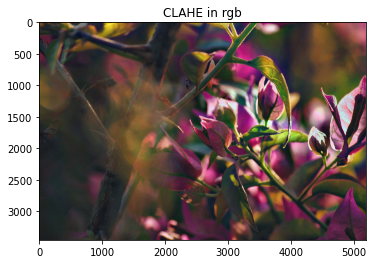

In [11]:
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB);  # 将图像转换为RGB显示
imgplot = plt.imshow(rgb)                   # 指定显示转换后的图像
plt.title('CLAHE in rgb')                   # 指定图像标题
plt.show()                                  # 显示图像  

### 实验小结

在本实验中，你了解如何分离 BGR 的色彩空间通道，分别执行直方图均衡或 CLAHE。之后，将色彩平面重新合并后形成整体被直方图均衡化的 BGR 图像。

根据我们的观察，我们可以得出结论，由于增强图像中引入了伪影（Artifact），因此对所有三个颜色通道（R，G 和 B）应用直方图均衡化不是很好的选择。看起来很不自然而且颜色失真。另一方面，使用 CLAHE 可以产生更好的效果，因为没有引入任何伪影（Artifact），并且颜色看起来更加自然。

可能 CLAHE 依然算不上是彩色图像增强的最优方法，在后面的实验中，我们将看到一些更好的方法来对彩色图像进行直方图均衡。